## MNIST example

In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 321s 28us/step


In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

In [9]:
#The network architecture

from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))
network.add(layers.Dense(10, activation = 'softmax'))

In [11]:
network.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [12]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [14]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [15]:
network.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
60000/60000 [==============================] - 2s 33us/step - loss: 0.2545 - accuracy: 0.9268
Epoch 2/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.1044 - accuracy: 0.9693
Epoch 3/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.0696 - accuracy: 0.9795
Epoch 4/5
60000/60000 [==============================] - 2s 33us/step - loss: 0.0504 - accuracy: 0.9851
Epoch 5/5
60000/60000 [==============================] - 2s 33us/step - loss: 0.0378 - accuracy: 0.9885


In [16]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc', test_acc)
print('test_loss', test_loss)

10000/10000 [==============================] - 0s 20us/step
test_acc 0.9772999882698059
test_loss 0.07446034319398459


## Basic data structure in Deep Learning

In [17]:
import numpy as np
x = np.array(12)

In [19]:
print(x.ndim)

0


In [20]:
y = np.array([12, 3, 6, 14, 7])
print(y.ndim)

1


In [21]:
#After reshape, ndim=3
#Before reshape, ndim=2
print(train_images.ndim)

2


Three key attributes:<br>
Number of axes (rank) <br>
Shape <br>
Data Type<br>


## Dataset Visualization

In [22]:
import matplotlib.pyplot as plt

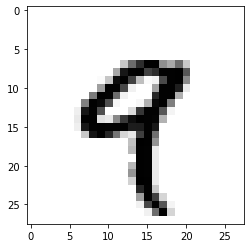

In [24]:
train_images = train_images.reshape((60000, 28, 28))
digit = train_images[4]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [26]:
my_slice = train=train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [27]:
#Select between any two indices along each tenor axis. 
corner = train_images[:, 14:, 14:]

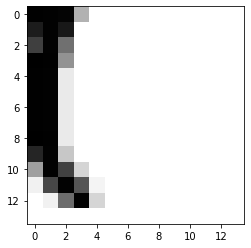

In [28]:
corner_plot = corner[4]
plt.imshow(corner_plot, cmap = plt.cm.binary)
plt.show()

## Tensor Operation  

In [29]:
#Relu
def naive_relu(x):
    assert len(x.shape) == 2
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] = max(x[i,j], 0)
            
    return x

In [30]:
#Add
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x
    
    

In [31]:
#Broadcasting
def navie_add_matrix_add_vector(x, y):
    assert len(x.shape) == 2 # x (32, 10)
    assert len(y.shape) == 1 # y (10, )
    assert  x.shape[1] == y.shape[0]
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x
    